Saving HR_comma_sep.csv to HR_comma_sep.csv
First 5 Rows:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                   

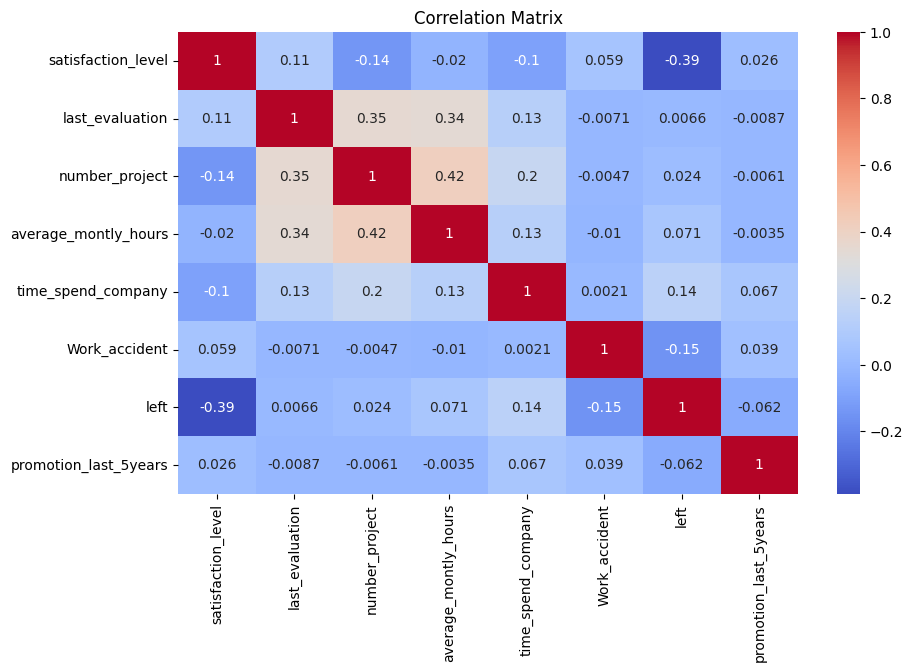

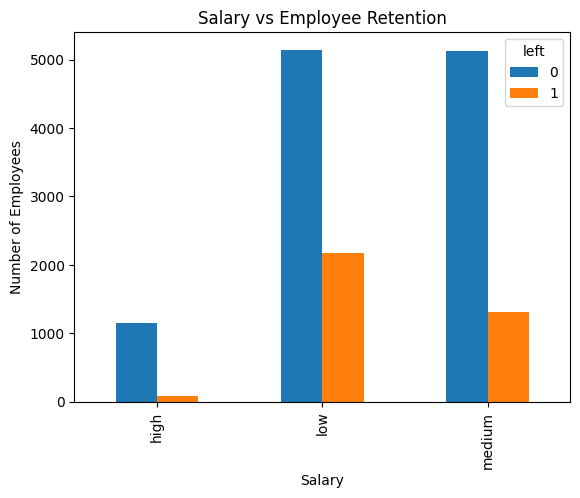

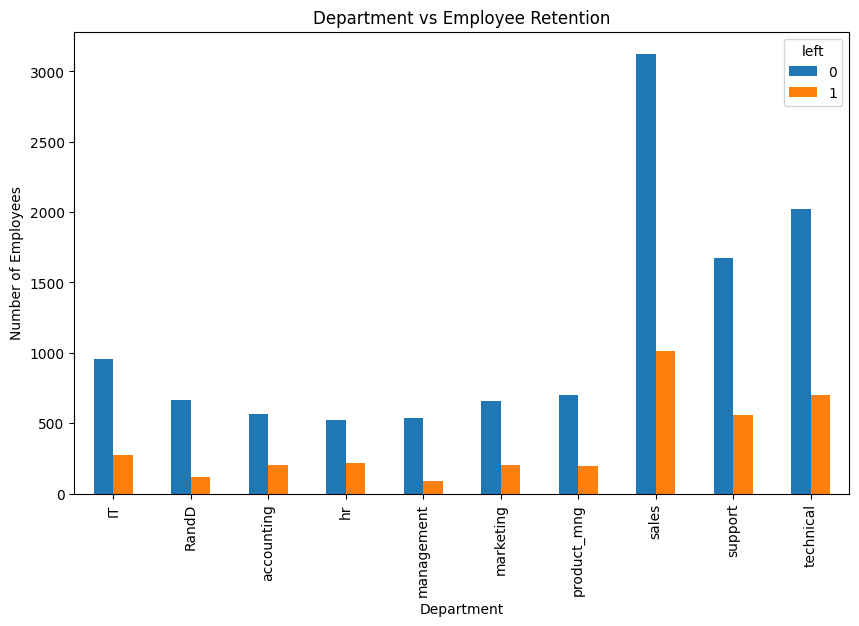

Binary Classification Accuracy: 0.7855555555555556


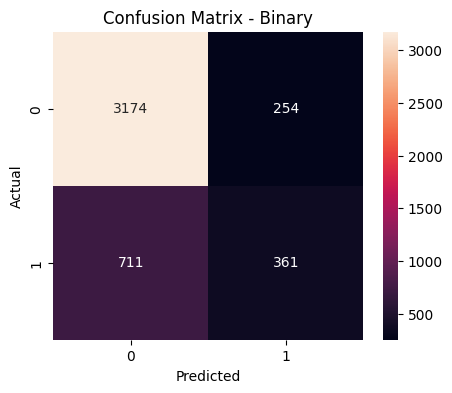

In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from google.colab import files
uploaded = files.upload()   # Upload HR_comma_sep.csv


hr = pd.read_csv("HR_comma_sep.csv")

print("First 5 Rows:")
print(hr.head())


plt.figure(figsize=(10,6))
sns.heatmap(
    hr.select_dtypes(include=['int64','float64']).corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix")
plt.show()

pd.crosstab(hr.salary, hr.left).plot(kind='bar')
plt.title("Salary vs Employee Retention")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.show()

pd.crosstab(hr.Department, hr.left).plot(kind='bar', figsize=(10,6))
plt.title("Department vs Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()


hr = pd.get_dummies(hr, columns=['salary','Department'], drop_first=True)

X = hr.drop("left", axis=1)
y = hr["left"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Binary Classification Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Binary")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




Saving zoo-data.csv to zoo-data.csv
First 5 Rows:
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


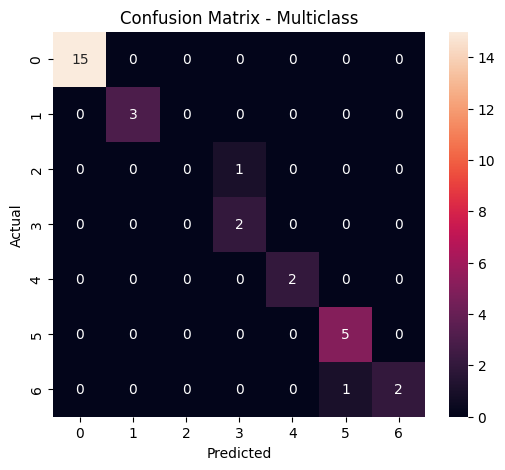

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from google.colab import files
uploaded = files.upload()   # Upload zoo-data.csv


zoo = pd.read_csv("zoo-data.csv")

print("First 5 Rows:")
print(zoo.head())

zoo = zoo.drop("animal_name", axis=1)

X = zoo.drop("class_type", axis=1)
y = zoo["class_type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Multiclass Classification Accuracy:",
      accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Multiclass")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

